In [1]:
import pandas as pd

datos_del_tiempo=pd.read_csv(r'/Users/ivan/Downloads/austin_weather.csv')

datos_del_tiempo.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [2]:
datos_del_tiempo.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [10]:
for nombre_columna in datos_del_tiempo.columns[4:-1]:
    datos_columna=datos_del_tiempo[nombre_columna]
    # Genera una matriz con True y False
        # True??   Datos que NO sean numericos
        # False??? Datos que son numéricos
    filtro=datos_columna.str.replace('.','').str.isnumeric()==False
    #                                        > FILTRO >
    #    1      |   1   |  True   |  False  |    1    | 
    #    2      |   2   |  True   |  False  |    2    | 
    #    3.5    |   35  |  True   |  False  |   3.5   | 
    #    T      |   T   |  False  |  True   |    T    | T   <<  -1
    #    -      |   -   |  False  |  True   |    -    | -   <<  -1
    datos_columna[filtro]=-1    ## Aplico el filtro
    datos_del_tiempo[nombre_columna]=datos_columna.astype(float) ## Cambio el tipo y asigno

<ipython-input-10-574c26f5ed3f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_columna[filtro]=-1    ## Aplico el filtro


In [11]:
datos_del_tiempo.dtypes

Date                           object
TempHighF                       int64
TempAvgF                        int64
TempLowF                        int64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
Events                         object
dtype: object

In [14]:
datos_del_tiempo['VisibilityAvgMiles'].describe()

count    1319.000000
mean        9.069750
std         1.743747
min        -1.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: VisibilityAvgMiles, dtype: float64

In [15]:
visibilidad=datos_del_tiempo['VisibilityAvgMiles']

In [16]:
visibilidad[visibilidad!=-1].describe()

count    1307.000000
mean        9.162204
std         1.458883
min         2.000000
25%         9.000000
50%        10.000000
75%        10.000000
max        10.000000
Name: VisibilityAvgMiles, dtype: float64

In [ ]:
# Establecer TIPOS de valores perdidos
# Precipitaciones     Ha llovido?
#    100               SI
#    120               SI
#                      SI
#                      NO   <--- NO APLICA
# -> Cuanto ha llovido de media? <--- 100 + 120 + ? + 0

# Tipo de mascota       TIENE MASCOTA?
#     perro                    si
#   cocodrilo                  si
#       NS                     si
#       NA                     no
# Frecuencias tipos de animales que tiene la gente que tiene animales?
#                  n  
#    perro         1
#    cocodrilo     1
#    desconocido   1
#                  3



In [18]:
eventos=datos_del_tiempo['Events']
eventos.describe()

count     1319
unique       9
top           
freq       903
Name: Events, dtype: object

In [20]:
eventos.unique()

array(['Rain , Thunderstorm', ' ', 'Rain', 'Fog', 'Rain , Snow',
       'Fog , Rain', 'Thunderstorm', 'Fog , Rain , Thunderstorm',
       'Fog , Thunderstorm'], dtype=object)

In [ ]:
# Cuantitativa  ----> ?? Tabla de frecuencias? SI ... tiene sentido??? Rara vez
# Alturas de la gente 1000    ->>>  HISTOGRAMA
# Cuantitativa-> Ordinal (cualitativa) ---> Si tiene sentido tabla de frecuencias
#                             ->>>  Grafico de BARRAS
# EjeX... en un histograma tiene una escala

In [33]:
datos_del_tiempo.groupby('Events').size()

Events
                             903
Fog                           21
Fog , Rain                    14
Fog , Rain , Thunderstorm     33
Fog , Thunderstorm             1
Rain                         192
Rain , Snow                    1
Rain , Thunderstorm          137
Thunderstorm                  17
dtype: int64

In [22]:
datos_del_tiempo.groupby('SeaLevelPressureAvgInches').size()

SeaLevelPressureAvgInches
-1.00     3
 29.55    1
 29.56    1
 29.57    2
 29.58    3
         ..
 30.60    2
 30.63    1
 30.64    1
 30.68    2
 30.74    1
Length: 101, dtype: int64

In [23]:
datos_del_tiempo['SeaLevelPressureAvgInches'].describe()

count    1319.000000
mean       29.952343
std         1.488362
min        -1.000000
25%        29.910000
50%        30.000000
75%        30.100000
max        30.740000
Name: SeaLevelPressureAvgInches, dtype: float64

In [24]:
presion=datos_del_tiempo['SeaLevelPressureAvgInches']
presion[presion!=-1].describe()

count    1316.000000
mean       30.022903
std         0.172145
min        29.550000
25%        29.910000
50%        30.000000
75%        30.100000
max        30.740000
Name: SeaLevelPressureAvgInches, dtype: float64

In [29]:
nivel_presion=pd.qcut(presion[presion!=-1],3,['baja','media','alta'])
nivel_presion

0        baja
1        alta
2        alta
3        alta
4        alta
        ...  
1314    media
1315     baja
1316     baja
1317     baja
1318    media
Name: SeaLevelPressureAvgInches, Length: 1316, dtype: category
Categories (3, object): [baja < media < alta]

In [39]:
nivel_presion.groupby().size()

KeyError: 'baja'

In [42]:
nivel_presion=pd.cut(presion[presion!=-1],3)#,labels=['baja','media','alta']
nivel_presion

0       (29.549, 29.947]
1       (29.947, 30.343]
2        (30.343, 30.74]
3        (30.343, 30.74]
4       (29.947, 30.343]
              ...       
1314    (29.947, 30.343]
1315    (29.549, 29.947]
1316    (29.549, 29.947]
1317    (29.549, 29.947]
1318    (29.947, 30.343]
Name: SeaLevelPressureAvgInches, Length: 1316, dtype: category
Categories (3, interval[float64]): [(29.549, 29.947] < (29.947, 30.343] < (30.343, 30.74]]

In [43]:
nivel_presion=pd.cut(presion[presion!=-1],(0,30,50))#,labels=['baja','media','alta']
nivel_presion

0        (0, 30]
1       (30, 50]
2       (30, 50]
3       (30, 50]
4       (30, 50]
          ...   
1314     (0, 30]
1315     (0, 30]
1316     (0, 30]
1317     (0, 30]
1318     (0, 30]
Name: SeaLevelPressureAvgInches, Length: 1316, dtype: category
Categories (2, interval[int64]): [(0, 30] < (30, 50]]

Text(0.5, 1.0, 'Diagrama de presiones')

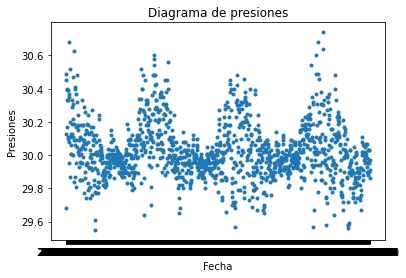

In [58]:
fecha=datos_del_tiempo['Date']

import matplotlib.pyplot as plt
plt.plot(fecha[presion!=-1],presion[presion!=-1],'.')
plt.ylabel('Presiones')
plt.xlabel('Fecha')
plt.title('Diagrama de presiones')

In [59]:
datos_del_tiempo.dtypes

Date                           object
TempHighF                       int64
TempAvgF                        int64
TempLowF                        int64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
Events                         object
dtype: object

In [60]:
datos_del_tiempo

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,0.00,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,0.00,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,0.00,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,-1.00,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,...,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,0.00,
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,...,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,0.00,
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,...,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,0.00,
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,...,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,0.00,


In [64]:
pd.Timestamp('2017-07-28')

Timestamp('2017-07-28 00:00:00')

In [67]:
fecha_texto=datos_del_tiempo['Date']
fecha=datos_del_tiempo['Date'].apply(lambda texto: pd.Timestamp(texto))

In [68]:
fecha

0      2013-12-21
1      2013-12-22
2      2013-12-23
3      2013-12-24
4      2013-12-25
          ...    
1314   2017-07-27
1315   2017-07-28
1316   2017-07-29
1317   2017-07-30
1318   2017-07-31
Name: Date, Length: 1319, dtype: datetime64[ns]

In [69]:
datos_del_tiempo['Date']=datos_del_tiempo['Date'].apply(lambda texto: pd.Timestamp(texto))

In [70]:
datos_del_tiempo.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                        float64
DewPointAvgF                         float64
DewPointLowF                         float64
HumidityHighPercent                  float64
HumidityAvgPercent                   float64
HumidityLowPercent                   float64
SeaLevelPressureHighInches           float64
SeaLevelPressureAvgInches            float64
SeaLevelPressureLowInches            float64
VisibilityHighMiles                  float64
VisibilityAvgMiles                   float64
VisibilityLowMiles                   float64
WindHighMPH                          float64
WindAvgMPH                           float64
WindGustMPH                          float64
PrecipitationSumInches               float64
Events                                object
dtype: object

Text(0.5, 1.0, 'Diagrama de presiones')

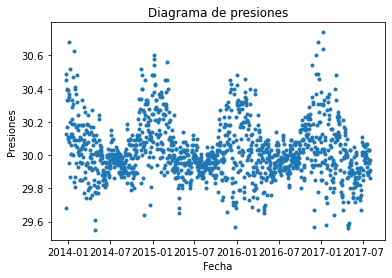

In [71]:
import matplotlib.pyplot as plt
plt.plot(datos_del_tiempo['Date'][presion!=-1],presion[presion!=-1],'.')
plt.ylabel('Presiones')
plt.xlabel('Fecha')
plt.title('Diagrama de presiones')

Text(0.5, 1.0, 'Diagrama de precipitaciones acumulado')

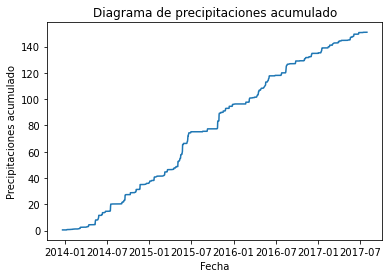

In [75]:
import matplotlib.pyplot as plt
precipitaciones=datos_del_tiempo['PrecipitationSumInches']
precipitaciones_limpias=precipitaciones[precipitaciones!=-1]
fechas=datos_del_tiempo['Date']
fechas_limpias=fechas[precipitaciones!=-1]

precipitaciones_acumuladas=precipitaciones_limpias.cumsum()


plt.plot(fechas_limpias,precipitaciones_acumuladas,'-')
plt.ylabel('Precipitaciones acumulado')
plt.xlabel('Fecha')
plt.title('Diagrama de precipitaciones acumulado')

In [76]:
datos_del_tiempo.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

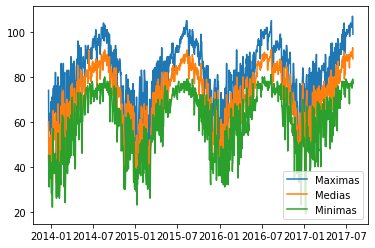

In [79]:


plt.plot(datos_del_tiempo['Date'],datos_del_tiempo['TempHighF'],label='Maximas')
plt.plot(datos_del_tiempo['Date'],datos_del_tiempo['TempAvgF'],label='Medias')
plt.plot(datos_del_tiempo['Date'],datos_del_tiempo['TempLowF'],label='Minimas')
#Convert from a temperature scale to another one among Celsius, Kelvin, Fahrenheit, and Rankine scales.plt.legend()

In [82]:
#Convert from a temperature scale to another one among Celsius, Kelvin, Fahrenheit, and Rankine scales.
from scipy.constants import convert_temperature as convertir
convertir(70, 'Fahrenheit', 'Celsius')



21.111111111111086

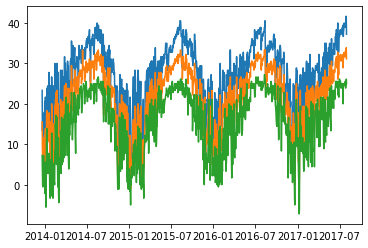

In [83]:
#.apply(lambda t: convertir(t,'Fahrenheit', 'Celsius'))

plt.plot(datos_del_tiempo['Date'],datos_del_tiempo['TempHighF'].apply(lambda t: convertir(t,'Fahrenheit', 'Celsius')),label='Maximas')
plt.plot(datos_del_tiempo['Date'],datos_del_tiempo['TempAvgF'].apply(lambda t: convertir(t,'Fahrenheit', 'Celsius')),label='Medias')
plt.plot(datos_del_tiempo['Date'],datos_del_tiempo['TempLowF'].apply(lambda t: convertir(t,'Fahrenheit', 'Celsius')),label='Minimas')


In [86]:
frecuencias_eventos=datos_del_tiempo.groupby('Events').size()
frecuencias_eventos
# Es como un dataframe.... Pero se llama SERIES= Dataframe, pero que solo tiene 1 columna

Events
                             903
Fog                           21
Fog , Rain                    14
Fog , Rain , Thunderstorm     33
Fog , Thunderstorm             1
Rain                         192
Rain , Snow                    1
Rain , Thunderstorm          137
Thunderstorm                  17
dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

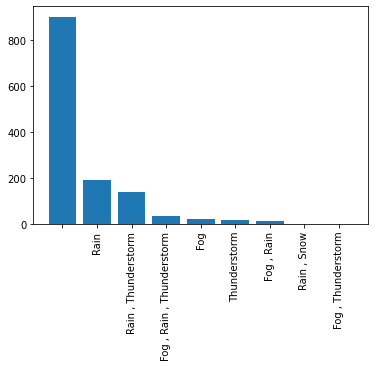

In [89]:
frecuencias_eventos_ordenados=frecuencias_eventos.sort_values(ascending=False)

plt.bar( frecuencias_eventos_ordenados.index, frecuencias_eventos_ordenados )
plt.xticks(rotation=90)